### Statistical Hypothesis Test
Statistical analysis or studies are always done using **samples** drawn from a **population**. It is either impossible to collect data from all members of the population or the data might be too large to fit into memory during analysis. We therefore use the sample statistics to make conclusions or inference about the population. But there is always uncertainties associated with the sample statistics and this means the inferences made about the population based on the sample might be wrong! It is therefore necessary to make sure that the sample, truely, is a good representation of the population under study. This calls for a **Statistical Hypothesis Test** to be conducted on the sample(s).

For example we use **Statistical Hypothesis Test** to find out whether a **sample mean** ($\bar{x}$) indeed is the same as the **population mean** ($\mu$) or whether the **sample standard deviation** ($s$) is the same as the **population standard deviation** ($\sigma$).

* Note that unlike sample parameters (e.g $\bar{x}$ and $s$) the **population parameters** are indicated using Greek symbols (e.g $\mu$ and $\sigma$) because they are unknown (they are *Greek* to us)!

It is also worth noting that there are two man types of Statistical Hypothesis Test: **parametric and non-parametric**.
**Parametric** hypthosis test assumes that the sample is normally or Gaussian dsitributed and therefore apply the well known and well studies **parameters** of the Gaussian distribution. If the sample is not normally distribution the **non-parametric** hypothesis test is used.

Scipy's **stats** module includes several functions that can be used for **Statistical Hypothesis Test** as demonstrated in the examples in theis notebook.

### Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set(color_codes = True) 

#### Load the data

In [9]:
path = '../data/camp.csv'
camp_df = pd.read_csv(path, na_values = 'NA')
camp_df.sample(10)

,customer_ID,spend,type
451,88,616.0,B
596,322,789.4,B
134,554,793.8,P
627,194,894.9,B
349,78,504.7,B
368,293,522.1,B
190,604,873.2,P
304,202,279.3,B
503,101,661.8,B
449,183,613.3,B


#### Get the two sample groups (P = post, B = before)

In [4]:
post = camp_df[camp_df['type'] == 'P']['spend']               # camp_df[camp_df.type == 'P'].spend
before = camp_df[camp_df['type'] == 'B']['spend']

**Are the two sample normally distributed?**

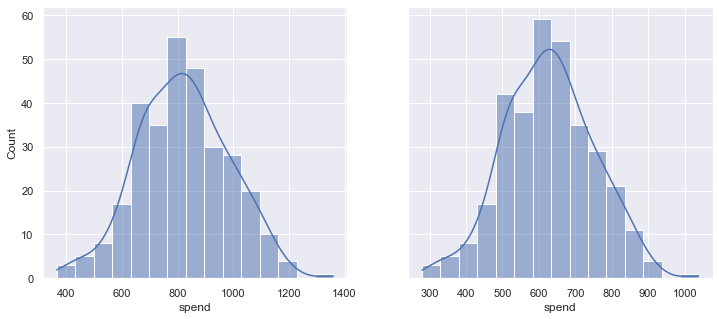

In [5]:
# sns.distplot(post)       # distplot() function is now formally deprecated
# sns.distplot(before)
fig, axes = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.histplot(post, kde = True, ax = axes[0]); 
sns.histplot(before, kde = True, ax = axes[1])
plt.show()

The **sample** or **t-distributions** are similar and they are **normal** or **gausian** distributions.

### t-Test
Test that the **mean** of two sample groups are **equal (mu1 = mu2)**

In [10]:
test_stat, p_value = stats.ttest_ind(post, before)
print(f'test statistic or t-test = {round(test_stat, 4)}, pvalue = {round(p_value, 4)}')

test statistic or t-test = 16.7275, pvalue = 0.0


The **pvalue = 0.0** is the **probability** that if a value is picked randomly from the **t-distibution** the value would be **larger** than **t-statistic = 16.7275**. This probability is **very small** and therefore **unlikely**! This suggests the difference in the **mean value** between both **before** and **post** groups is very large. **We should therefore reject `H0` which assumes that the mean spending of both before and post groups are equal**.

In [7]:
alpha = 0.05
if p_value <= alpha:
    print('Significant result! The spending attitude before and after campaign are different (reject H0)')
else:
    print('Not significant result! The spending attitude before and after campaign are similar (fail to reject H0)')

Significant result! The spending attitude before and after campaign are different (reject H0)


### Non-parametric Statistical tests
#### Mann-Whitney U test and Rank Sums test
This test is an example of **non-parametric** test because **no distribution information** (normal or non-normal) is needed. It can also be used to test for the **equality in mean** for two sample groups of data.

* Pool two samples (with sample size **n1** and **n2**), one from each population or group and **rank** each sample
* **Sum the ranks** of each sample, which gives **r1** and **r2**
* compute U-statistics `U1 = r1 - n1*(n1+1)/2 and U2 = r2 - n2*(n2+1)/2`
* Choose the **smaller of U1 and U2** as the test statistics **U** to consult **significance table (p-values)**

#### Rank Sums test

In [11]:
path = '../data/camp.csv'
camp_df = pd.read_csv(path, na_values = 'NA')

post = camp_df[camp_df['type'] == 'P']['spend']       # first sample             
before = camp_df[camp_df['type'] == 'B']['spend']     # second sample

test_stat, p_value = stats.ranksums(post, before)
print(f'test statistic or U-test = {round(test_stat, 4)}, pvalue = {round(p_value, 4)}')

alpha = 0.05
if p_value <= alpha:
    print('Significant result! The spending attitude before and after campaign are different (reject H0)')
else:
    print('Not significant result! The spending attitude before and after campaign are similar (fail to reject H0)')

test statistic or U-test = 14.2171, pvalue = 0.0
Significant result! The spending attitude before and after campaign are different (reject H0)


### Mann-Whitney U test

In [14]:
test_stat, p_value = stats.mannwhitneyu(post, before)
print(f'test statistic or U-test = {round(test_stat, 4)}, pvalue = {round(p_value, 4)}')

alpha = 0.05
if p_value <= alpha:
    print('Significant result! The spending attitude before and after campaign are different (reject H0)')
else:
    print('Not significant result! The spending attitude before and after campaign are similar (fail to reject H0)')

test statistic or U-test = 82234.5, pvalue = 0.0
Significant result! The spending attitude before and after campaign are different (reject H0)


###  ANalysis Of VAriance (ANOVA ): Used for more than 2 samples
**ANOVA** under the hood is a collection of statistical models used to analyze the differences among group **means** and **variation** among and between groups.

* When **sample groups is greater than 2** we use **f-test**, also know as ANOVA (**AN**alysis **O**f **VA**riance). 
* It also assumes samples are **normally distributed**
* An **f-test** for **two sample groups** is equivalent to a **t-test**
* **f-test** or **ANOVA** is an extension of two-sample **t-test**

**f-test** or **ANOVA** tests the **variations in the means** of a group of sample groups. ANOVA is to test the following hypothesis:

* **H0**: Variance among groups $= 0$. This implies $\mu_1 = \mu_2 = \mu_3 = ...\mu_k$ (**equal means**)
* **H1**: Variance among groups $\neq 0$. This implies **at least one mean is different**.

**Between-group Sum of Squares (SSB)** measures the difference in average values of major effect among sample group. This is done by measuring the **sum of squared deviations between each sample mean to the overall mean score**.

$f-test = \frac{(Mean Square Between groups or MSB)}{(Mean Square Within groups or MSW)}$

* The larger **MSB** or smaller **MSW** the `larger` **f-test** and the `smaller` the **pvalue** indicating the **difference between the groups is significant (reject H0)**.
* The smaller **MSB** or larger **MSW** the `smaller` **f-test** and the `larger` the **pvalue** indicating the **there is no difference between the groups (fail to reject H0)**.

### Case Study: Compare Net Collection Rate
The net **collection rate** is the **percentage of money collected** by a collection agency **divided by its total charges**, excluding write-offs. For example a net collection rate of **63%** implies that the Collection Agency collects **USD 0.63 for every dollar it charges**. If the **collection rate is too high it indicates a problem with the collection process** while if its **too low it means the collection charge is too high**. A bank wants to compare the net collection rates among several agencies by answering the following questions:

* **What kind of statistical procedure should be used**?
* **Interpret result based on the analysis**

In [15]:
path = '../data/collection.csv'
df = pd.read_csv(path, na_values = 'NA')
df.sample(10)

,c_type,id,rate,c_name
146,AII,26,0.52,Allied Interstate Inc
106,CW,85,0.32,Caine & Weiner
174,RCL,123,0.70,Regency Credit LLC
10,RCL,130,0.05,Regency Credit LLC
65,CW,129,0.21,Caine & Weiner
195,AII,28,0.69,Allied Interstate Inc
94,RCL,57,0.28,Regency Credit LLC
12,AII,93,0.06,Allied Interstate Inc
136,CW,102,0.45,Caine & Weiner
108,RCL,62,0.32,Regency Credit LLC


### Get the unique names of the collection agencies

In [16]:
print(f'Unique Collection Agencies:\n {list(set(df["c_name"]))}')

Unique Collection Agencies:
 ['Allied Interstate Inc', 'Regency Credit LLC', 'Stevens and Ricci Inc', 'Caine & Weiner']


### Get the collection `rates` for each `collection agency` as a sample group

In [17]:
d1 = df[df['c_name'] == 'Stevens and Ricci Inc']['rate']
d2 = df[df['c_name'] == 'Caine & Weiner']['rate']
d3 = df[df['c_name'] == 'Allied Interstate Inc']['rate']
d4 = df[df['c_name'] == 'Regency Credit LLC']['rate']

#### Check distribution whether it's normal for all groups

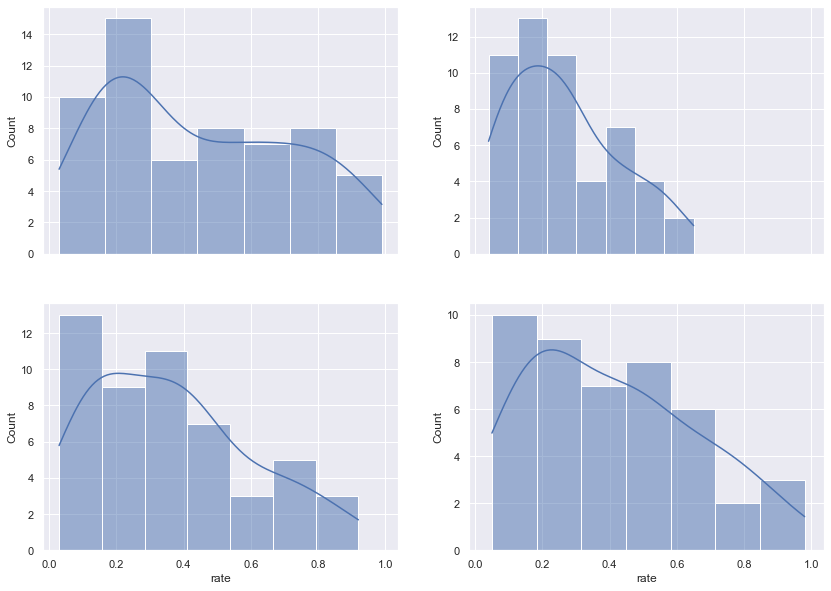

In [18]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10), sharex = True)
sns.histplot(d1, kde = True, ax = axes[0,0]); 
sns.histplot(d2, kde = True, ax = axes[0,1])
sns.histplot(d3, kde = True, ax = axes[1,0]); 
sns.histplot(d4, kde = True, ax = axes[1,1])
plt.show()

### Compare the samples by calculating the f-test score

In [19]:
test_stat, p_value = stats.f_oneway(d1, d2, d3, d4)
print(f'test statistic = {round(test_stat, 4)}, pvalue = {round(p_value, 4)}')

alpha = 0.05
if p_value <= alpha:
    print('Significant result! This implies that at least one group mean is different. The groups vary (reject H0)')
else:
    print('Not significant result! There is no variation among the groups. Group means are equal (fail to reject H0)')

test statistic = 6.2179, pvalue = 0.0005
Significant result! This implies that at least one group mean is different. The groups vary (reject H0)


As we can see **pvalue = 0.0005** is less than **alpha (0.05)** and the **test statistic = 6.2179**. The small **pvalue** means that the **test statistic** is large. This also means that the **Mean Square Between groups (MSB)** is `larger` than **Mean Square Within group (MSW)**. This suggests that **difference between the groups is significant**. We therefore **reject H0** and **accept H1** hypothesis, that there is significant variation among the groups.

The above analysis is known as **one way** ANOVA because the only **categorical variable** under study is the **company name**. We wanted to find out the **effect of agency name** on the samples.

#### Bar chart for the group means

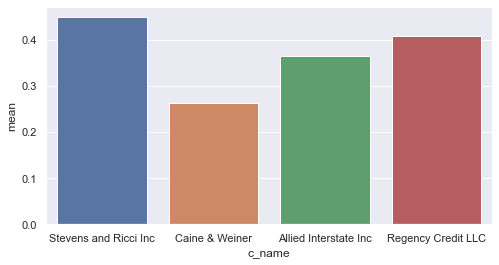

In [23]:
means = [np.mean(d1), np.mean(d2), np.mean(d3), np.mean(d4)]
names = ['Stevens and Ricci Inc', 'Caine & Weiner', 'Allied Interstate Inc', 'Regency Credit LLC']

plt.figure(figsize = (8, 4))
sns.barplot(x = names, y = means)
plt.xlabel('c_name')
plt.ylabel('mean')
plt.show()

### Multiple ANOVA

In [43]:
tc_p1 = pd.read_csv('../data/Consumers_ext.csv', na_values = 'NA')
tc_p1.head(3)

,customer_id,income,age,owner,education,gender,spend
0,Cus_1,111000,26,0,College,M,56000
1,Cus_2,79000,82,0,College,F,29000
2,Cus_3,42000,72,0,Master,F,17000


In [46]:
print(list(tc_p1))

['customer_id', 'income', 'age', 'owner', 'education', 'gender', 'spend']


In [ ]:
cw_lm = ols('sales_new ~ C(group) + C(offer) + C(s1) + C(s2) + C(s3)  + C(s4)+ C(s5) + C(s6) + C(s7) + C(s8) + C(s9) + C(s10)',
           data = tc_p1).fit()     # C in C(s1) means categorical variable => s1 is already binary

In [ ]:
print(sm.stats.anova_lm(cw_lm, typ = 2))

#### Two-way f-test
In this **two-way ANOVA** we will study the effect of **smoking** (yes or no) and **gender** (male or female) on **income** distribution.
#### ANOVA for coffee effect test

In [47]:
path = '../data/coffee_info.csv'
df = pd.read_csv(path, na_values = 'NA')
df.head(3)

,Person_ID,Cups_Per_Week,Age,Gender,Employment,Education,Income,Married,Own_Home,Smoker,Favourite_NonAlc_Drink,Veg,cup_tea,spend_food
0,5,1,60.0,F,fulltime,high school,45000.0,married,no,yes,tea,nonveg,0,11787
1,6,1,40.0,F,fulltime,high school,46000.0,married,no,no,other,veg,6,18674
2,9,3,NaN,F,fulltime,high school,47000.0,married,no,no,coffee,veg,1,14814


In [48]:
v1 = ['M', 'F']           # gender 
v2 = ['yes', 'no']        # smoker
data = df[(df['Gender'].isin(v1)) & (df['Smoker'].isin(v2))]

**Fit using Ordinary least squares (ols)**

In [49]:
model = ols('Income ~ Gender + Smoker', data).fit()          # Gender and Smoker are already categorical variable, not binary
print(model.summary())                                       # So we don't use C to represent them

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.923
Date:                Mon, 02 May 2022   Prob (F-statistic):             0.0557
Time:                        07:43:11   Log-Likelihood:                -2850.9
No. Observations:                 244   AIC:                             5708.
Df Residuals:                     241   BIC:                             5718.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.348e+04   2794.839     15.558

The traditional threshold for pvalue is **0.05**. The results above show a pvalue for Gender to be **0.063** which is very close to the threshold. This means that **Gender (M or F) has a small impact on the income**. 

The pvalue for **Smoker** is **0.158** which is very much **higher than alpha (0.05)**. This implies that **Smoker (yes or no) has no impact on the Income**. This means smoking does not affect someone's income!

### ANOVA with Interaction (multiple ways f-test)
The effects of **owning a home, education** and the **interaction of both** on **amount spent on food**.

In [50]:
data = df.copy()
model = ols('spend_food ~ Own_Home + Education + Own_Home * Education', data).fit()    # ols used for ANOVA and linreg
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             spend_food   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5.867
Date:                Mon, 02 May 2022   Prob (F-statistic):           3.86e-05
Time:                        10:13:47   Log-Likelihood:                -2616.3
No. Observations:                 250   AIC:                             5245.
Df Residuals:                     244   BIC:                             5266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

##### Owning a home
**H0** assumes that **`Own_Home[T.yes]`** has **no impact** on **spend_food**. 

However the **pvalue = 0.003** is **less than alpha (0.05)**. This means we should **reject H0** hypothesis but rather accept **H1** which assumes that **`Own_Home[T.yes]`** has a **significant** impact on **spend_food**. 

##### Education gradschool
**H0** assumes that **`Education[T.gradschool]`** has **no impact** on **spend_food**. 

The **pvalue = 0.127** is **greater than alpha (0.05)**. This means we should accept **H0** which assumes that being from **gradschool** does not affect the amount spent on food **(spend_food)**. 

This means **`Education[T.gradschool]`** is not a **predictor** for **spend_food** and should **not** be included in the model.

##### Education high school
**H0** assumes that **`Education[T.high school]`** has **no impact** on **spend_food**. 

The **pvalue = 0.046** is **very close** to **0.05**. We can therefore conclude that **high school** education has a **not so significant** impact on **spend_food**. We can narrowly **reject or accept H0** meaning **`Education[T.high school]`** is **not a good predictor** for **spend_food**. 

The **negative** coefficient (**-2992.2333**) indicates that if you graduate from high school the amount spend on food is **less**, though **insignificant** because of the **not so low pvalue**.

##### Own Home + Education gradschool
**H0** assumes that **`Own_Home[T.yes]:Education[T.gradschool] `** has **no impact** on **spend_food**. 

The **pvalue = 0.029** is **less than alpha (0.05)**. This means we should **reject H0** hypothesis but rather accept **H1** which assumes that **`Own_Home[T.yes]:Education[T.gradschool] `** has a **significant** impact on **spend_food**. This means that owning a home as a grad school graduate has a significant impact on the amount spent on food! 

This means **`Own_Home[T.yes]:Education[T.gradschool] `** is a good **predictor** for **spend_food** and **should be included** in the model.

The **negative** coefficient (**-8354.5829**) indicates that if you graduate from high gradschool the amount spend on food is **less**, and **significant** because of the **low pvalue**.

##### Own Home + Education high school
**H0** assumes that **`Own_Home[T.yes]:Education[T.high school]`** has **no impact** on **spend_food**. 

The **pvalue = 0.151** is **greater than alpha (0.05)**. This means we should **accept H0** which assumes that **owning a home as a high school** graduate **does not** affect the amount spent on food **spend_food**. 

This means **`Own_Home[T.yes]:Education[T.high school]`** is **not a predictor** for **spend_food** and should **not be included** in the model.

**When the pvalue is `too small` compared to `0.05` H0 (which assumes that variables are the same `without a significant dependency`) is `rejected` and H1 (which claims that variables are not equal and have a significant dependency) is accepted**.

### Plot the effects and interactions

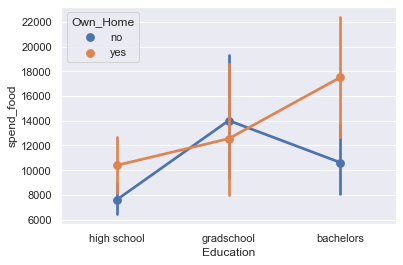

In [52]:
sns.pointplot(x = 'Education', y = 'spend_food', hue = 'Own_Home', data = data)
plt.show()

### Paired t-Test or Matched-pairs test
* Compares the **means** of **two or more samples**
* It's different from **t- or f-test** in that **two or more samples** are collected from the **same sampled population**. *T-test* is based on samples collected from **two different groups**
* The pair is often based on individual **id** such as **patient id**...(Data collected from **same patient before and after the use of drugs**)
* Data is assumed to be **normally distributed**
* Sample size should be greater than **15** (based on experience)
* If data is **not normally distributed** we use **Wilcoxon Singed-rank Test**
### Wilcoxon Singed-rank Test
We wish to find out whether **H0: 4.5 times the amount spent on food is = someone's income (`4.5*spend_food = Income`)**.

In [54]:
path = '../data/coffee_info.csv'
df = pd.read_csv(path, na_values = 'NA')
df1 = df[(df.Income > 0) & (df.spend_food > 0)]

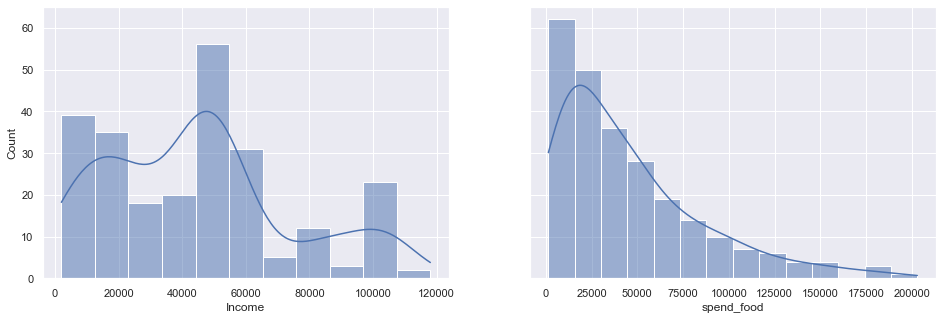

In [55]:
fig, axes = plt.subplots(1, 2, figsize = (16, 5), sharey = True)
sns.histplot(df1.Income, kde = True, ax = axes[0]); 
sns.histplot(4.5*df1.spend_food, kde = True, ax = axes[1])
plt.show()

In [56]:
test_stat, p_value = stats.wilcoxon(df1.Income, 4.5*df1.spend_food)    # testing whether Income = 4.5*spend_food (pair test)
print(f'test statistic = {round(test_stat, 4)}, pvalue = {round(p_value, 4)}')

alpha = 0.05
if p_value <= alpha:
    print('Significant result! There is significant difference between Income and 4.5xspend_food (reject H0)')
else:
    print('Not significant result! There is no significant difference between Income and 4.5xspend_food (fail to reject H0)')

test statistic = 14664.0, pvalue = 0.799
Not significant result! There is no significant difference between Income and 4.5xspend_food (fail to reject H0)


### Chi-square Independency Test
**Chi-square test** is used when you want to find out whether there is a **relationship or `correlation` between two categorical variables**. If the **chi-square pvalue is greater than 0.05** then there is **no significant difference** between the categorical variables. For example investigating the relationship between **'Education'** and **'Gender'**. If the **chi-square pvalue is greater than 0.05** then it can be concluded that there is **no difference in 'Education'** between the **'Gender' (M, F)**. That is being male or female has **not effect on education (fail to reject H0)**. 

However, if **chi-square pvalue is less than 0.05** then there is **significant difference** in **'Education'** between the **'Gender' (M, F)**. That is being male or female has **an effect on education (reject H0)**. There is **a strong correlation** between **'Education'** and **'Gender' (M, F)**.

#### Helper function to generate the contigency table

In [60]:
def contigency_table(df, col1, col2):
    '''Generate the contigency table from 
       columns col1 and col2 of dataframe df.
    '''
    group_sizes = df.groupby([col1, col2]).size()
    ctsum = group_sizes.unstack(col1)
    table = ctsum.fillna(0)
    return table

**Call the function...**

In [61]:
# table = pd.crosstab(df['Gender'], df['Education'], margins = False)

table = contigency_table(df, 'Education', 'Gender')  
print(f'contigency table:\n{table}')

test_stat, p_value, dof, expected = stats.chi2_contingency(table)
print(f'dof = {dof}\n')
print(f'expected:\n{expected}')
print()

# We can interpret the statistic by retrieving the critical value from the Chi-Squared distribution
prob = 0.95               # 95% confidence level
critical = stats.chi2.ppf(prob, dof)
print(f'probability = {round(prob, 3)}, critical = {round(critical, 3)}, test statistic = {round(test_stat, 3)}')

if abs(test_stat) >= critical:
    print('Variables are dependent or correlated (reject H0)')
else:
    print('Variables are independent or not correlated (fail to reject H0)')
print()    
alpha = 1.0 - prob
print(f'significance = {round(alpha, 3)}, pvalue = {round(p_value, 3)}')
if p_value <= alpha:
    print('Significant result! Variables are dependent or correlated (reject H0)')
else:
    print('Not significant result! Variables are independent or uncorrelated (fail to reject H0)')

contigency table:
Education  bachelors  gradschool  high school
Gender                                       
F                 36          25           85
M                 30          10           64
dof = 2

expected:
[[38.544 20.44  87.016]
 [27.456 14.56  61.984]]

probability = 0.95, critical = 5.991, test statistic = 2.961
Variables are independent or not correlated (fail to reject H0)

significance = 0.05, pvalue = 0.227
Not significant result! Variables are independent or uncorrelated (fail to reject H0)


The **chi-sq statistics (test statistic = 2.961)** is **less than** the **critical = 5.991** and **pvalue = 0.227** is very much larger than the threshold of **0.05**. There is therefore **NO significant relationship** between the two categorical variables (Education and Gender). Therefore we **accept** or **fail to reject H0**. 

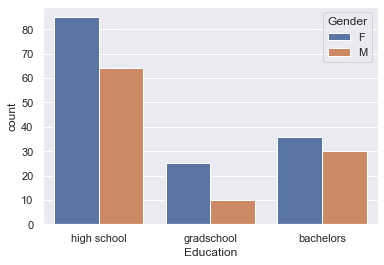

In [59]:
#sns.countplot(y = 'Education', hue = 'Gender', orient = 'h', data = df)
sns.countplot(x = 'Education', hue = 'Gender',  data = df)
plt.show()

### Contigency Table using `pd.crosstab()`

In [68]:
table = pd.crosstab(df['Gender'], df['Education'], margins = False)
print(table)

Education  bachelors  gradschool  high school
Gender                                       
F                 36          25           85
M                 30          10           64


In [69]:
table = pd.crosstab(df['Education'], df['Gender'], margins = False)
print(table)

Gender        F   M
Education          
bachelors    36  30
gradschool   25  10
high school  85  64


#### Proportion Test
This is equvalent to the well known **z-test** for comparing two independent proportions.